## Implementação de um algoritmo de Regressão Logística
### Este implementação foi realizada por Matheus Facure
#### fonte: https://github.com/matheusfacure/Tutoriais-de-AM/blob/master/Regress%C3%A3o%20Linear/Regress%C3%A3o%20Log%C3%ADstica.ipynb


Valor de Horas na autoescola     --->  [15 16 18 20 22 24 26 28 30 32 34 36 38 40 42]
Acidente (1) ou Sem Acidente (0) --->  [1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


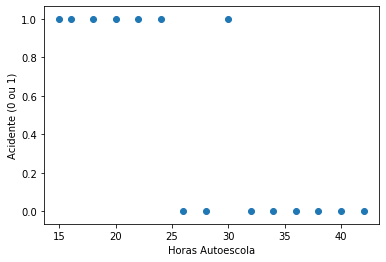

Acurácia:  0.9333333333333333
Os pesos do modelos são: 11.764, -0.436


In [1]:

import numpy as np
from matplotlib import pyplot as plt, style
from IPython import display

class logistic_regr(object):

    def __init__(self, learning_rate=0.0001, training_iters=100):
        self.learning_rate = learning_rate # taxa de aprendizado
        self.training_iters = training_iters # iterações de treino
        
    
    def _logistic(self, X):
        '''Função logística'''
        return  1 / (1 + np.exp(-np.dot(X, self.w_hat)))
    
    
    def fit(self, X_train, y_train):
        
        # formata os dados
        X = X_train.reshape(-1,1) if len(X_train.shape) < 2 else X_train
        X = np.insert(X, 0, 1, 1)
               
        # inicia os parâmetros com pequenos valores aleatórios (nosso chute razoável)
        self.w_hat = np.random.normal(0,1, size = X[0].shape)
        
        # loop de treinamento
        for _ in range(self.training_iters):
            
            gradient = np.zeros(self.w_hat.shape) # inicia o gradiente
            
            # atualiza o gradiente com informação de todos os pontos
            for var in range(len(gradient)):
                gradient[var] += np.dot((self._logistic(X) - y_train), X[:,var])
            
            gradient *= self.learning_rate # multiplica o gradiente pela taxa de aprendizado

            # atualiza os parâmetros
            self.w_hat -= gradient
            
            
    def predict(self, X_test):
        
        # formata os dados
        if len(X_test.shape) < 2:
            X = X_test.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        # aplica função logística
        logit = self._logistic(X) 
        
        # aplica limiar
        return np.greater_equal(logit, 0.5).astype(int)
       
    
"""Dados de Treinamento """
x = np.linspace(15,42,15).astype(int)
y_logit = x*-0.5 + 15 + np.random.normal(0,1.5, x.shape)
y = np.round(np.exp(y_logit) / (np.exp(y_logit) + 1), 0)
print('Valor de Horas na autoescola     ---> ',x)
print('Acidente (1) ou Sem Acidente (0) ---> ', y)

""" Grafico: Numero de Horas Autoescola x Acidente ocorrido ou não """
plt.scatter(x, y)
plt.xlabel("Horas Autoescola")
plt.ylabel("Acidente (0 ou 1)")
plt.show()

"""Treinando o Modelo para Regressao Logistica """
regr = logistic_regr(learning_rate=0.001, training_iters=90000)
regr.fit(x, y)

"""Testando a acurácia do modelo"""
x_teste = np.array([1,2,3,4,5,6,107,108,109,110,111,112,113,114,115])
y_hat = regr.predict(x_teste)
#print('Predicao %.1f horas --> %.1f' % (x_teste[0], y_hat))
print('Acurácia: ', np.mean(np.equal(y_hat, y)))
print('Os pesos do modelos são: %.3f, %.3f' % (regr.w_hat[0], regr.w_hat[1]))